## The `extent` parameter in `geomImshow()` 

A list of four numbers: `[left, right, bottom, top]` that
defines the image bounding box
in terms of 'data coordinates'.

In [1]:
%useLatestDescriptors
%use lets-plot
@file:DependsOn("org.apache.commons:commons-math3:3.6.1")

In [2]:
LetsPlot.getInfo()

Lets-Plot Kotlin API v.4.11.0. Frontend: Notebook with dynamically loaded JS. Lets-Plot JS v.4.7.0.

The default `extent` is derived from the image's array dimentions: `[-0.5, ncol-0.5, -0.5, nrow-0.5]`.


In [3]:
// An 2x2 pix image by default has extent [-0.5, 1.5, -0.5, 1.5]
val arr = RasterData.create(
    listOf(
        listOf(
            listOf(150, 0, 0), listOf(0, 150, 0)
        ),
        listOf(
            listOf(0, 0, 150), listOf(150, 150, 0)
        )
    )
)

letsPlot() + geomImshow(arr)

-0.5 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 0.5 
 
 
 
 
 
 
 
 
 1 
 
 
 
 
 
 
 
 
 1.5 
 
 
 
 
 
 
 
 
 
 
 -0.5 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 0.5 
 
 
 
 
 
 
 1 
 
 
 
 
 
 
 1.5 
 
 
 
 
 
 
 
 
 y 
 
 
 
 
 x

## When does image `extent` need to be set explicitly

Let's assume that our image doesn't exist in vacuum but is related to some data, 
and the image' bounding box in the 'data coordinates' is: 

- `(x, y) = (0, -1)`
- `(width, height) = (8, 3)`.

The image `extent` in this case would be: `[0, 8, -1, 3]`.

In [4]:
import org.apache.commons.math3.distribution.MultivariateNormalDistribution

In [5]:
val cov0 : Array<DoubleArray> = arrayOf(doubleArrayOf(1.0, -.8),
                                        doubleArrayOf(-.8, 1.0))

val cov1 : Array<DoubleArray> = arrayOf(doubleArrayOf(10.0, .1),
                                        doubleArrayOf(.1, 0.1))

val n = 400

val means0 : DoubleArray = doubleArrayOf(4.0, 0.0)
val means1 : DoubleArray = doubleArrayOf(4.0, 1.0)

val xy0 = MultivariateNormalDistribution(means0, cov0).sample(n)
val xy1 = MultivariateNormalDistribution(means1, cov1).sample(n)

val data = mapOf(
    "x" to (xy0.map { it[0] } + xy1.map { it[0] }).toList(),
    "y" to (xy0.map { it[1] } + xy1.map { it[1] }).toList()
)

In [6]:
letsPlot(data) { x = "x"; y = "y" } + geomDensity2D() + ggsize(620, 300)

<path d="M470.4726403161262 88.75941316040377 L470.4726403161262 88.75941316040377 L470.3699833383091 88.8492175588836 L470.31866675404194 88.89410934393452 L470.101433146335 89.05643783664851 L469.0947848336967 91.35776906646684 L468.8312241001488 91.96030377442071 L468.6234746165148 92.76894192913421 L470.4726403161262 93.95229650983109 L472.58329021699944 92.88328868672298 L474.40563236599706 91.96030377442071 L473.16954925868777 90.78094841908322 L471.8006002210345 89.47482476995839 L471.48423986847274 88.89410934393452 L470.74564715187546 88.77472375078253 L470.4726403161262 88.75941316040377 " fill="none" stroke-width="1.1" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 <path d="M211.40676883420127 12.079279252973492 L211.40676883420127 12.079279252973492 L211.66825111339284 12.239248581779691 L212.3377903133637 12.806352593576548 L213.92611543366786 14.043766148161808 L215.54558456711754 15.305443012265883 L216.54218661565278 15.965955488328646 L218.05262364831225 16.967019559835492 L218.976483134889 17.967634691350753 L219.34949545773887 18.37163744275209 L221.78322191066036 19.80644529956541 L223.07435470595073 20.56763498735799 L224.50880088772294 21.43783187323828 L224.81439991618578 21.54710887605013 L225.06429077797378 21.636465588156213 L228.5492447389264 22.980059716609873 L228.90206821207363 23.11608778246466 L232.07595790763526 24.347448182449455 L232.27547044770586 24.41677968635598 L232.52653660469008 24.504026303724473 L236.61736820080569 25.58426693891917 L239.08762503729676 26.23657240577802 L241.0632915788549 26.70626389852501 L244.69735913164766 27.57022073421068 L245.65459023177308 27.764688408114196 L246.09929216695826 27.855032475398033 L247.39062696470043 28.134920040596796 L250.44207121856758 28.737322595891584 L253.11095929661977 29.2642026121255 L255.0963576475821 29.76820261931448 L258.5164920350814 30.63641516469687 L259.5631023820782 30.88109442233035 L260.1226264262813 31.01190139185485 L263.2839505519445 32.01885877586959 L263.69460498126404 32.140587247491666 L267.1342935559428 33.1601988799424 L267.8013473869063 33.410907678433134 L268.57747045174824 33.70260959518306 L271.6025933631645 34.81482136658266 L274.1459606856043 35.749911661372096 L275.36036754118663 36.23774522494854 L276.68237876891874 36.76880402566927 L279.02649538679236 37.70074592507444 L281.15762781526576 38.548012476632366 L282.79399229839976 39.119418042589345 L284.843237953935 39.83499845615546 L286.77130479017114 40.446338034478316 L288.1692949449273 40.889604157646815 L291.38768415694574 41.493794775102316 L292.3950169876289 41.6829021219331 L295.18096207458876 42.18472463428225 L296.58790721433456 42.28593730309596 L301.6122068817901 42.647374834593975 L302.19262920425024 42.6908098696333 L302.6302279212932 42.70983144232706 L307.0325727679459 42.90119288664161 L309.05097184877786 42.96824151768489 L309.20429633391177 42.973334760607614 L309.4164863847341 42.99398336571102 L315.0622076430885 43.405729055500245 L316.21596346357325 43.489873129288995 L318.4782120209552 43.89047172700133 L320.35256120354734 44.158457612262836 L323.2276305932347 44.569521902065006 L325.2942108983112 45.06367399126668 L329.07360635463124 45.967387317127816 L329.8544248435141 46.135691809823214 L330.23929772289625 46.218650699294855 L331.4449900282628 46.49463525449151 L334.5750537355659 47.13756034611934 L337.2509648525578 47.68720104386806 L339.676290559853 47.97298944648141 L342.6344024568262 48.32155874224429 L344.2626319822192 48.48117900476905 L345.7924917522699 48.36457572955726 L349.11340494289516 48.08862507136435 L351.27429911188074 47.90906597602276 L354.20457010597147 47.248791644479255 L356.57936563600674 46.71368191083741 L358.28596624154227 46.29825494343146 L358.7723507965799 46.18008275548112 L359.6477833153168 45.967387317127816 L363.0188422557035 44.97087443404611 L365.2976333712038 44.297244947108766 L367.73141231174515 43.965481777503854 L370.84659528462487 43.54083229115737 L372.3093005008653 43.30180962144142 L

Let's show the data and the image on the same plot.

In [7]:
letsPlot(data) {x="x"; y="y"} + 
 geomImshow(arr, extent=listOf(0.0, 8.0, -1.0, 3.0)) + 
 geomDensity2D(color="yellow") + 
 ggsize(620, 300) + flavorHighContrastDark()

<path d="M470.4726403161262 97.32842141360705 L470.4726403161262 97.32842141360705 L470.3699833383091 97.40313907301925 L470.31866675404194 97.44048923807374 L470.101433146335 97.57554726682079 L469.0947848336967 99.49026509729399 L468.8312241001488 99.99157665725109 L468.6234746165148 100.66436720264036 L470.4726403161262 101.64892348296829 L472.58329021699944 100.75950421411233 L474.40563236599706 99.99157665725109 L473.16954925868777 99.01034775022973 L471.8006002210345 97.92364705830916 L471.48423986847274 97.44048923807374 L470.74564715187546 97.34115989297648 L470.4726403161262 97.32842141360705 " fill="none" stroke-width="1.1" stroke="rgb(255,255,0)" stroke-opacity="1.0">
 
 
 
 <path d="M211.40676883420127 33.530208564769126 L211.40676883420127 33.530208564769126 L211.66825111339284 33.663303758640126 L212.3377903133637 34.13513682163038 L213.92611543366786 35.164670408944815 L215.54558456711754 36.214391177817475 L216.54218661565278 36.763940499001976 L218.05262364831225 37.59683026398881 L218.976483134889 38.429346508903606 L219.34949545773887 38.765478596994825 L221.78322191066036 39.95924512271148 L223.07435470595073 40.59255833234616 L224.50880088772294 41.31656601617216 L224.81439991618578 41.40748496909535 L225.06429077797378 41.48183015145116 L228.5492447389264 42.59970644902019 L228.90206821207363 42.71288240551104 L232.07595790763526 43.737379741244666 L232.27547044770586 43.795063861211105 L232.52653660469008 43.86765343534951 L236.61736820080569 44.76641845387847 L239.08762503729676 45.30913950686153 L241.0632915788549 45.69992492024821 L244.69735913164766 46.41874085452686 L245.65459023177308 46.58053882513151 L246.09929216695826 46.65570549139167 L247.39062696470043 46.888573191907824 L250.44207121856758 47.38977480026412 L253.11095929661977 47.82814131983841 L255.0963576475821 48.247471570008244 L258.5164920350814 48.96982827370421 L259.5631023820782 49.173402505552076 L260.1226264262813 49.28223448664785 L263.2839505519445 50.12002751388273 L263.69460498126404 50.22130614429936 L267.1342935559428 51.06962756257926 L267.8013473869063 51.27821839926841 L268.57747045174824 51.52091569288156 L271.6025933631645 52.44628083909264 L274.1459606856043 53.224280128085496 L275.36036754118663 53.63015982518449 L276.68237876891874 54.07200311205891 L279.02649538679236 54.84738292207304 L281.15762781526576 55.55231246563967 L282.79399229839976 56.02772444084492 L284.843237953935 56.623090531236244 L286.77130479017114 57.13172778254628 L288.1692949449273 57.50052717077796 L291.38768415694574 58.00321645481377 L292.3950169876289 58.16055460942569 L295.18096207458876 58.57807317419291 L296.58790721433456 58.66228256532116 L301.6122068817901 58.963000200920305 L302.19262920425024 58.999138343478606 L302.6302279212932 59.01496437665821 L307.0325727679459 59.174177950413565 L309.05097184877786 59.22996270999269 L309.20429633391177 59.234200310783365 L309.4164863847341 59.251380042172585 L315.0622076430885 59.593954289479925 L316.21596346357325 59.66396253354513 L318.4782120209552 59.99726235060922 L320.35256120354734 60.22022780042231 L323.2276305932347 60.56223511990632 L325.2942108983112 60.97337185846034 L329.07360635463124 61.725265369590915 L329.8544248435141 61.865295456932174 L330.23929772289625 61.9343176223682 L331.4449900282628 62.16393800118344 L334.5750537355659 62.69885454020577 L337.2509648525578 63.156158048148114 L339.676290559853 63.39393527166817 L342.6344024568262 63.6839464778366 L344.2626319822192 63.81675124700713 L345.7924917522699 63.719736802825096 L349.11340494289516 63.49014462646791 L351.27429911188074 63.34075065961102 L354.20457010597147 62.79139947572695 L356.57936563600674 62.34618579462435 L358.28596624154227 62.000548707948056 L358.7723507965799 61.902228921381564 L359.6477833153168 61.725265369590915 L363.0188422557035 60.89616221363913 L365.2976333712038 60.335699481000134 L367.73141231174515 60.05967104662871 L370.84659528462487 59.706360783128275 L372.3093005008653 59.507492857615205 L

### Flipping and transposing image using `extent`

In [8]:
@file:DependsOn("com.github.jai-imageio:jai-imageio-core:1.3.0")
import javax.imageio.ImageIO
import java.net.URL
import org.jetbrains.letsPlot.geom.Extensions.create

val img = ImageIO.read(
    URL("https://github.com/JetBrains/lets-plot-docs/raw/master/source/examples/cookbook/images/fisher_boat.png")
)
val fisherBoat = RasterData.create(img)
fisherBoat

RasterData(225 x 225 x 3)

<path d="M204.93692767323557 39.91173561970891 C204.93692767323557 39.91173561970891 208.08692767323558 39.91173561970891 208.08692767323558 36.76173561970891 L208.08692767323558 22.061735619708905 C208.08692767323558 22.061735619708905 208.08692767323558 18.911735619708907 204.93692767323557 18.911735619708907 L148.003899763271 18.911735619708907 C148.003899763271 18.911735619708907 144.853899763271 18.911735619708907 144.853899763271 22.061735619708905 L144.853899763271 36.76173561970891 C144.853899763271 36.76173561970891 144.853899763271 39.91173561970891 148.003899763271 39.91173561970891 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="1.0" stroke-width="1.0">
 
 
 
 original 
 
 
 
 
 <path d="M516.5005350151431 39.91173561970891 C516.5005350151431 39.91173561970891 519.6505350151431 39.91173561970891 519.6505350151431 36.76173561970891 L519.6505350151431 22.061735619708905 C519.6505350151431 22.061735619708905 519.6505350151431 18.911735619708907 516.5005350151431 18.911735619708907 L424.6750048155411 18.911735619708907 C424.6750048155411 18.911735619708907 421.52500481554114 18.911735619708907 421.52500481554114 22.061735619708905 L421.52500481554114 36.76173561970891 C421.52500481554114 36.76173561970891 421.52500481554114 39.91173561970891 424.6750048155411 39.91173561970891 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="1.0" stroke-width="1.0">
 
 
 
 flip columns 
 
 
 
 
 <path d="M506.4822723498631 628.1464480138865 C506.4822723498631 628.1464480138865 509.63227234986306 628.1464480138865 509.63227234986306 624.9964480138865 L509.63227234986306 610.2964480138864 C509.63227234986306 610.2964480138864 509.63227234986306 607.1464480138865 506.4822723498631 607.1464480138865 L434.6932674808212 607.1464480138865 C434.6932674808212 607.1464480138865 431.5432674808212 607.1464480138865 431.5432674808212 610.2964480138864 L431.5432674808212 624.9964480138865 C431.5432674808212 624.9964480138865 431.5432674808212 628.1464480138865 434.6932674808212 628.1464480138865 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="1.0" stroke-width="1.0">
 
 
 
 transpose 
 
 
 
 
 <path d="M209.49143154383637 628.1464480138865 C209.49143154383637 628.1464480138865 212.64143154383638 628.1464480138865 212.64143154383638 624.9964480138865 L212.64143154383638 610.2964480138864 C212.64143154383638 610.2964480138864 212.64143154383638 607.1464480138865 209.49143154383637 607.1464480138865 L143.44939589267017 607.1464480138865 C143.44939589267017 607.1464480138865 140.29939589267016 607.1464480138865 140.29939589267016 610.2964480138864 L140.29939589267016 624.9964480138865 C140.29939589267016 624.9964480138865 140.29939589267016 628.1464480138865 143.44939589267017 628.1464480138865 Z" stroke="rgb(71,71,71)" stroke-opacity="1.0" fill="rgb(255,255,255)" fill-opacity="1.0" stroke-width="1.0">
 
 
 
 flip rows 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 
 
 180 
 
 
 
 
 
 
 
 
 200 
 
 
 
 
 
 
 
 
 
 
 0 
 
 
 
 
 
 
 20 
 
 
 
 
 
 
 40 
 
 
 
 
 
 
 60 
 
 
 
 
 
 
 80 
 
 
 
 
 
 
 100 
 
 
 
 
 
 
 120 
 
 
 
 
 
 
 140 
 
 
 
 
 
 
 160 
 
 
 
 
 
 
 180 
 
 
 
 
 
 
 200 
 
 
 
 
 
 
 
 
 y 
 
 
 
 
 x
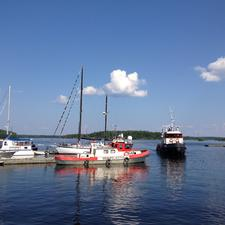
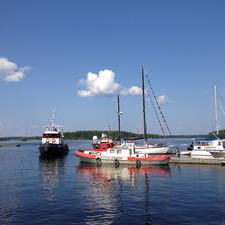
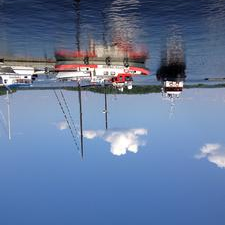
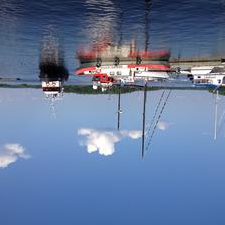
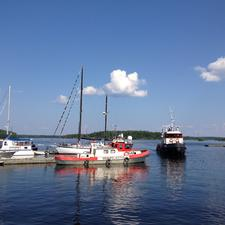
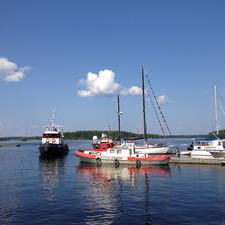
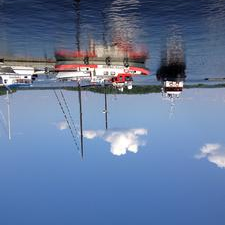
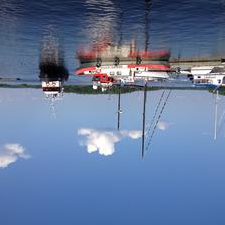

In [9]:
val dim = 100

val ext_base = listOf(0, dim, dim, dim + dim)
val ext_flip_x = listOf(dim + dim, 0 + dim, 0 + dim, dim + dim)
val ext_flip_y = listOf(0, dim, dim, 0)
val ext_transpose = listOf(dim + dim, 0 + dim, dim, 0)

val label_data = mapOf(
    "x" to listOf(50, 150, 150, 50),
    "y" to listOf(200, 200, 0, 0),
    "label" to listOf("original", "flip columns", "transpose", "flip rows")
)

(letsPlot() + 
     geomImshow(fisherBoat, extent=ext_base) + 
     geomImshow(fisherBoat, extent=ext_flip_x) + 
     geomImshow(fisherBoat, extent=ext_flip_y) + 
     geomImshow(fisherBoat, extent=ext_transpose) + 
        
     geomHLine(yintercept=100, color="yellow", tooltips=tooltipsNone) + 
     geomVLine(xintercept=100, color="yellow", tooltips=tooltipsNone) + 
     geomLabel(data=label_data) {x="x"; y="y"; label="label" } +
     ggsize(700, 700)
)